In [1]:
#Advertising Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv('advertising.csv')
data1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
print(data1.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
corr_matrix = data1.corr(numeric_only = True)
sales_matrix = corr_matrix['Sales']
sales_matrix

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

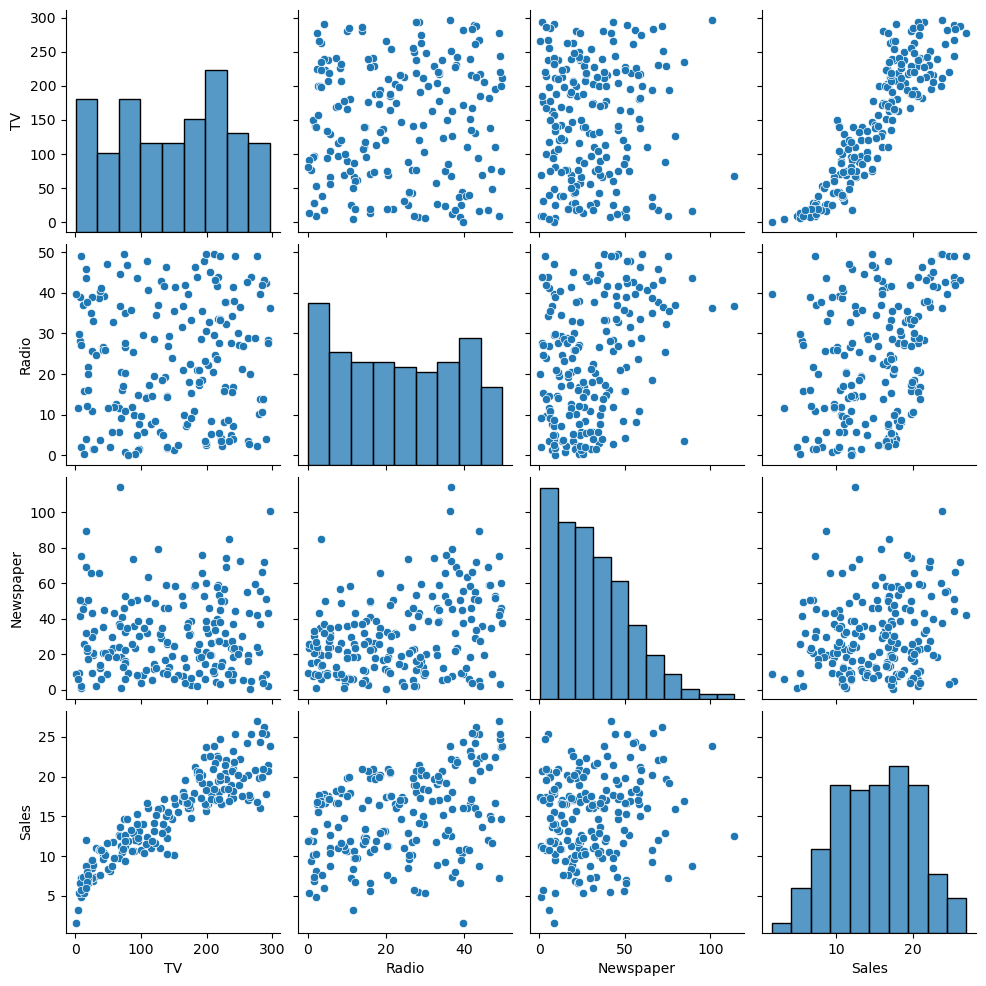

In [8]:
sns.pairplot(data1)

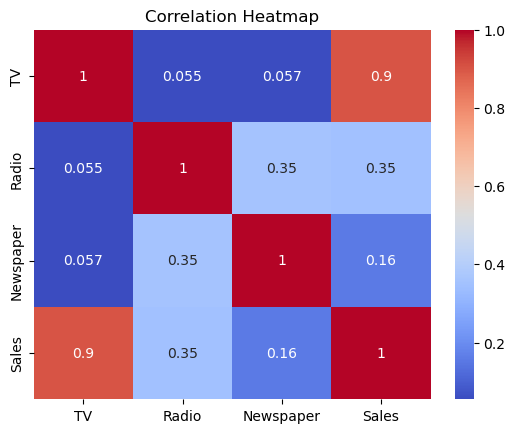

In [10]:
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Updated weights:
w0 = 14.9387
w1 = 4.6008
w2 = 1.6078
w3 = -0.1046
Mean Squared Error: 2.758482205265958


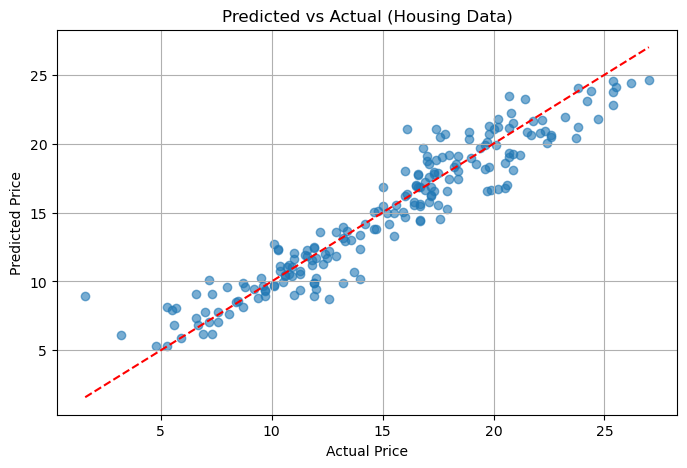

In [21]:
X = data1[['TV', 'Radio', 'Newspaper']].values
y = data1['Sales'].values.reshape(-1, 1)

X = (X - X.mean(axis=0)) / X.std(axis=0)

X_b = np.c_[np.ones((X.shape[0], 1)), X] 

theta = np.zeros((X_b.shape[1], 1))

learning_rate = 0.01

for i in range(X_b.shape[0]):
    xi = X_b[i].reshape(1, -1)        
    yi = y[i].reshape(1, 1)          

    y_pred_i = xi @ theta             
    error_i = y_pred_i - yi           

    gradient = 2 * xi.T @ error_i     
    theta = theta - learning_rate * gradient

print("Updated weights:")
for i, w in enumerate(theta.flatten()):
    print(f"w{i} = {w:.4f}")

y_pred = X_b @ theta

mse = np.mean((y - y_pred) ** 2)

print("Mean Squared Error:", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Housing Data)")
plt.grid(True)
plt.show()

In [13]:
# Housing Data

In [14]:
data2 = pd.read_csv('Housing.csv')
print(data2.isnull().sum())  

binary_map = {'yes': 1, 'no': 0} 
for x in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    data2[x] = data2[x].map(binary_map)

data2 = pd.get_dummies(data2, columns=['furnishingstatus'], drop_first=True)

data2.head()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [15]:
corr_matrix = data2.corr(numeric_only=True)
price_matrix = corr_matrix['price']
price_matrix

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.384394
prefarea                           0.329777
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

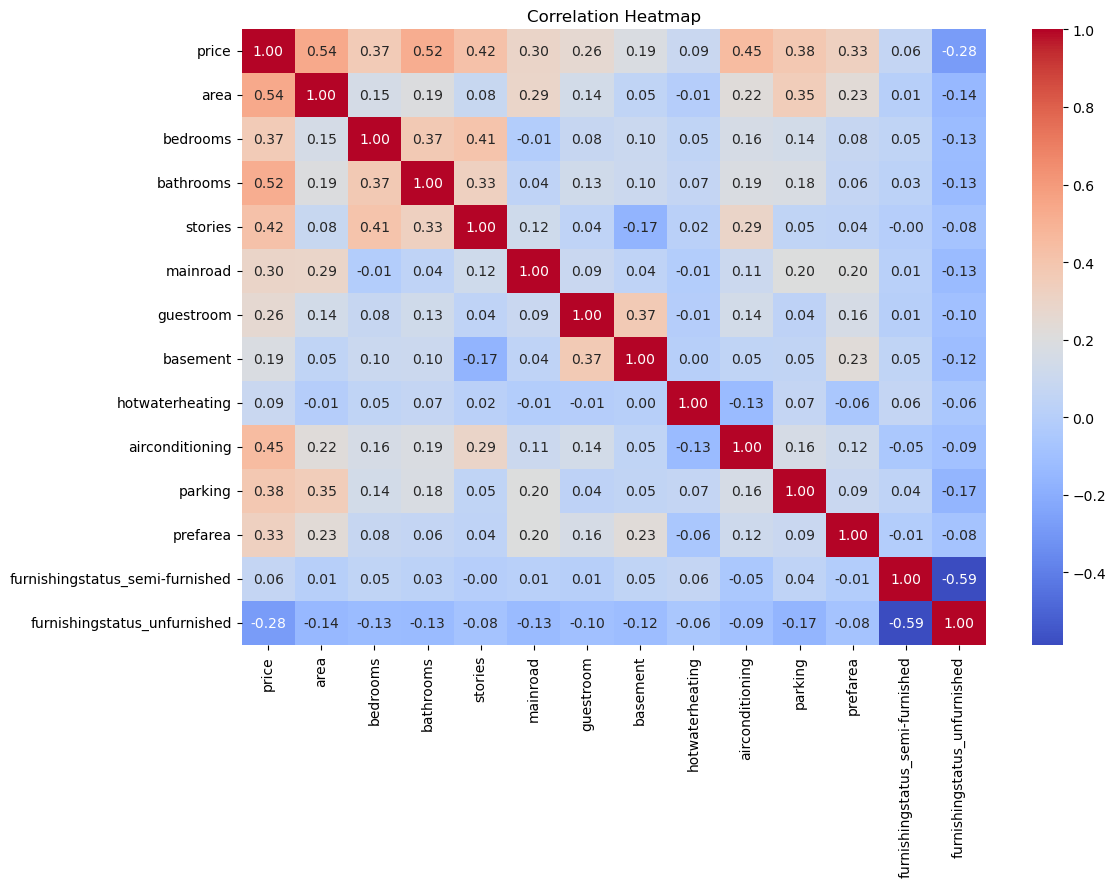

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data2.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Model Parameters:
intercept: 5.6921
area: 548.3948
bedrooms: 18.9977
bathrooms: 8.7983
stories: 12.8676
mainroad: 4.4818
guestroom: 1.8430
basement: 3.3939
hotwaterheating: 0.7408
airconditioning: 2.3855
parking: 2.7548
prefarea: 1.4622
furnishingstatus_semi-furnished: 2.4110
furnishingstatus_unfurnished: 2.1555
Mean Squared Error (MSE): 6295651014889.474


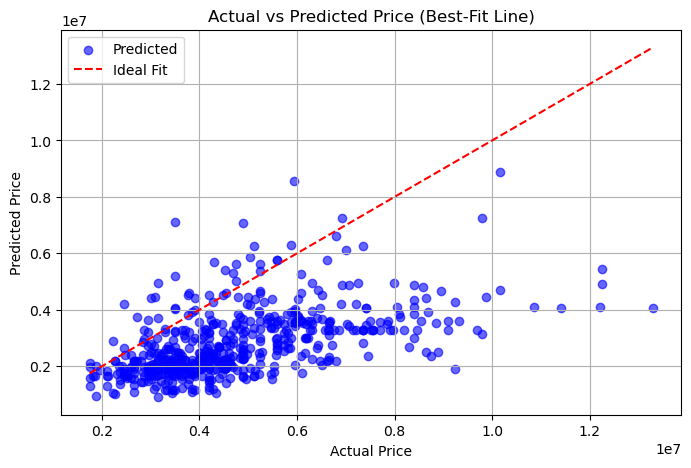

In [19]:
data2 = data2.dropna()

X = data2.drop('price', axis=1).astype(np.float64).values
y = data2['price'].astype(np.float64).values.reshape(-1, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X] 

theta = np.zeros((X_b.shape[1], 1))

learning_rate = 0.00000001
n = X_b.shape[0]

for i in range(n):
    xi = X_b[i].reshape(1, -1)   
    yi = y[i].reshape(1, 1)      

    y_pred_i = xi @ theta
    error_i = y_pred_i - yi

    gradient = 2 * xi.T @ error_i
    theta = theta - learning_rate * gradient 

columns = ['intercept'] + list(data2.drop('price', axis=1).columns)
print("\nModel Parameters:")
for name, val in zip(columns, theta.flatten()):
    print(f"{name}: {val:.4f}")

y_pred = X_b @ theta

mse = np.mean((y - y_pred) ** 2)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Best-Fit Line)")
plt.legend()
plt.grid(True)
plt.show()